<a href="https://colab.research.google.com/github/MehrdadJalali-AI/socialNetworkOptimization/blob/main/Social_Network_Optimization_SNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Optimization (SNO) Algorithm

This notebook demonstrates a simple implementation of the **Social Network Optimization (SNO)** algorithm.

The idea is inspired by how information spreads in a social network. Each solution is represented as a node in a graph. High-quality solutions influence their neighbors, guiding the search toward optimal solutions.

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Benchmark Functions

We'll use two common test functions: Sphere and Rastrigin.

In [ ]:
def sphere(x):
    return sum([xi**2 for xi in x])

def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

## Initialize Population
We initialize the population as nodes in a graph, where each node is a solution.

In [ ]:
def initialize_population(num_nodes, dim, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.3)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], dim)
        G.nodes[node]['fitness'] = None
    return G

## Evaluate Fitness
Calculate the fitness of each node using the chosen benchmark function.

In [ ]:
def evaluate_fitness(G, func):
    for node in G.nodes:
        pos = G.nodes[node]['position']
        G.nodes[node]['fitness'] = func(pos)

## Information Diffusion
Better solutions influence their neighbors.

In [ ]:
def diffuse_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        neighbor_fitness = [G.nodes[n]['fitness'] for n in neighbors]
        best_neighbor = neighbors[np.argmin(neighbor_fitness)]
        new_positions[node] = (
            G.nodes[node]['position'] * (1 - alpha) +
            G.nodes[best_neighbor]['position'] * alpha
        )
    for node, pos in new_positions.items():
        G.nodes[node]['position'] = pos

## Optimization Loop
Run the SNO algorithm over multiple iterations.

In [ ]:
def sno_optimize(func, dim=2, bounds=(-5.12, 5.12), num_nodes=20, iterations=50):
    G = initialize_population(num_nodes, dim, bounds)
    best_fitness_over_time = []

    for _ in range(iterations):
        evaluate_fitness(G, func)
        diffuse_information(G)
        best_fitness = min([G.nodes[n]['fitness'] for n in G.nodes])
        best_fitness_over_time.append(best_fitness)

    return G, best_fitness_over_time

## Run and Visualize
Run the algorithm on both Sphere and Rastrigin functions and compare convergence.

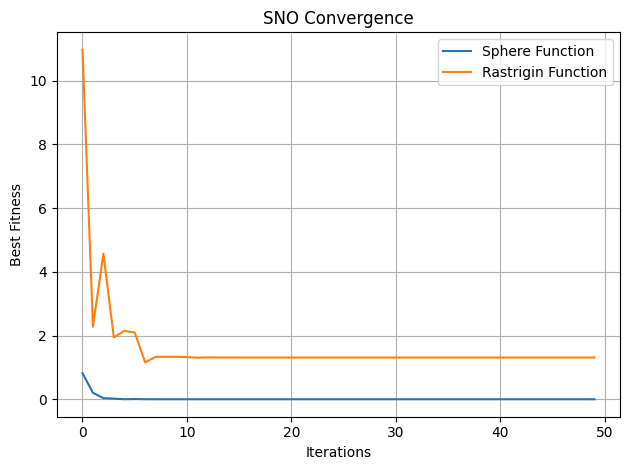

In [ ]:
G_sphere, fitness_sphere = sno_optimize(sphere)
G_rastrigin, fitness_rastrigin = sno_optimize(rastrigin)

plt.plot(fitness_sphere, label='Sphere Function')
plt.plot(fitness_rastrigin, label='Rastrigin Function')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('SNO Convergence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-9-f4a91cd32a84>:53: RuntimeWarning: invalid value encountered in arccos
  return sum([(np.cos((j + 1) * np.arccos(x[i])) - (-1) ** j) ** 2 for i in range(n) for j in range(n)])


               Function  Average Function Evaluations  \
0     Storn’s Chebyshev                        1000.0   
1       Inverse Hilbert                        1000.0   
2         Lennard-Jones                        1000.0   
3             Rastrigin                        1000.0   
4              Griewank                        1000.0   
5           Weierstrass                        1000.0   
6     Modified Schwefel                        1000.0   
7  Expanded Schaffer F6                        1000.0   
8             Happy Cat                        1000.0   
9                Ackley                        1000.0   

   SNO Average Best Fitness  Success Rate (SR)  Robustness Score  \
0                       NaN                0.0               NaN   
1              1.697759e+18                0.0      1.159987e+06   
2             -4.579199e+00                0.0      1.495453e+00   
3              1.205800e+03                0.0      4.478248e+05   
4              1.162647e+00     

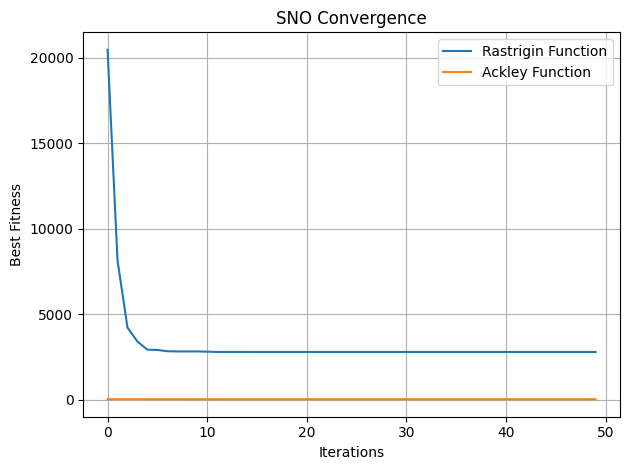

In [9]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# SNO Functions
def initialize_population(num_nodes, dim, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.3)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], dim)
        G.nodes[node]['fitness'] = None
    return G

def evaluate_fitness(G, func):
    for node in G.nodes:
        pos = G.nodes[node]['position']
        G.nodes[node]['fitness'] = func(pos)
    return len(G.nodes)  # Return number of evaluations

def diffuse_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        neighbor_fitness = [G.nodes[n]['fitness'] for n in neighbors]
        best_neighbor = neighbors[np.argmin(neighbor_fitness)]
        new_positions[node] = (
            G.nodes[node]['position'] * (1 - alpha) +
            G.nodes[best_neighbor]['position'] * alpha
        )
    for node, pos in new_positions.items():
        G.nodes[node]['position'] = pos

def sno_optimize(func, dim, bounds, num_nodes=20, iterations=50):
    G = initialize_population(num_nodes, dim, bounds)
    best_fitness_over_time = []
    total_evaluations = 0

    for _ in range(iterations):
        evaluations = evaluate_fitness(G, func)
        total_evaluations += evaluations
        diffuse_information(G)
        best_fitness = min([G.nodes[n]['fitness'] for n in G.nodes])
        best_fitness_over_time.append(best_fitness)

    best_solution = G.nodes[np.argmin([G.nodes[n]['fitness'] for n in G.nodes])]['position']
    return G, best_fitness_over_time, best_solution, total_evaluations  # Return graph and fitness history

# Benchmark Functions
def storn_chebyshev(x):
    n = len(x)
    return sum([(np.cos((j + 1) * np.arccos(x[i])) - (-1) ** j) ** 2 for i in range(n) for j in range(n)])

def inverse_hilbert(x):
    n = len(x)
    H = np.array([[1 / (i + j + 1) for j in range(n)] for i in range(n)])
    return np.linalg.norm(np.linalg.inv(H) - np.diag(x))

def lennard_jones(x, epsilon=1e-9):
    n = len(x) // 3
    X, Y, Z = x[:n], x[n:2*n], x[2*n:]
    energy = 0
    for i in range(n):
        for j in range(i + 1, n):
            r2 = (X[i] - X[j])**2 + (Y[i] - Y[j])**2 + (Z[i] - Z[j])**2
            if r2 < epsilon:
                continue
            energy += 4 * ((1/r2)**6 - (1/r2)**3)
    return energy

def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def griewank(x):
    sum_part = sum(xi**2 / 4000 for xi in x)
    prod_part = np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)])
    return sum_part - prod_part + 1

def weierstrass(x, a=0.5, b=3, k_max=20):
    return sum([sum([a**k * np.cos(2 * np.pi * b**k * (xi + 0.5)) for k in range(k_max)]) for xi in x])

def modified_schwefel(x):
    return 418.9829 * len(x) - sum([xi * np.sin(np.sqrt(abs(xi))) for xi in x])

def expanded_schaffer_f6(x):
    def f6(xi, xj):
        return 0.5 + (np.sin(np.sqrt(xi**2 + xj**2))**2 - 0.5) / (1 + 0.001 * (xi**2 + xj**2))**2
    return sum([f6(x[i], x[i+1]) for i in range(len(x)-1)])

def happy_cat(x):
    alpha = 1/8
    sum_x2 = sum([xi**2 for xi in x])
    return ((sum_x2 - len(x))**2)**alpha + (0.5 * sum_x2 + sum(x)) / len(x) + 0.5

def ackley(x):
    a, b, c = 20, 0.2, 2 * np.pi
    d = len(x)
    return -a * np.exp(-b * np.sqrt(np.sum(x**2) / d)) - np.exp(np.sum(np.cos(c * x)) / d) + a + np.exp(1)

# Function Details
function_details = {
    "Storn’s Chebyshev": (9, [-8192, 8192]),
    "Inverse Hilbert": (16, [-16384, 16384]),
    "Lennard-Jones": (18, [-4, 4]),
    "Rastrigin": (10, [-100, 100]),
    "Griewank": (10, [-100, 100]),
    "Weierstrass": (10, [-100, 100]),
    "Modified Schwefel": (10, [-100, 100]),
    "Expanded Schaffer F6": (10, [-100, 100]),
    "Happy Cat": (10, [-100, 100]),
    "Ackley": (10, [-100, 100])
}

benchmark_functions = {
    "Storn’s Chebyshev": storn_chebyshev,
    "Inverse Hilbert": inverse_hilbert,
    "Lennard-Jones": lennard_jones,
    "Rastrigin": rastrigin,
    "Griewank": griewank,
    "Weierstrass": weierstrass,
    "Modified Schwefel": modified_schwefel,
    "Expanded Schaffer F6": expanded_schaffer_f6,
    "Happy Cat": happy_cat,
    "Ackley": ackley
}

global_optima = {
    "Storn’s Chebyshev": 0.0,
    "Inverse Hilbert": 0.0,
    "Lennard-Jones": -1.0,
    "Rastrigin": 0.0,
    "Griewank": 0.0,
    "Weierstrass": 0.0,
    "Modified Schwefel": 0.0,
    "Expanded Schaffer F6": 0.0,
    "Happy Cat": 0.0,
    "Ackley": 0.0
}

# Run SNO and Collect Metrics
num_runs = 10
max_iterations = 50
num_nodes = 20

metrics = {
    "Function": [],
    "Average Function Evaluations": [],
    "SNO Average Best Fitness": [],
    "Success Rate (SR)": [],
    "Robustness Score": [],
    "Population Diversity (PD)": [],
    "Success Rate with Threshold (SRT)": [],
    "Convergence Speed (CS)": []
}

for name, func in benchmark_functions.items():
    dim, bounds = function_details[name]
    best_fitnesses, function_evals, all_solutions = [], [], []

    for _ in range(num_runs):
        G, fitness_history, best_solution, evaluations = sno_optimize(func, dim, bounds, num_nodes, max_iterations)
        best_fitnesses.append(min(fitness_history))
        function_evals.append(evaluations)
        all_solutions.append(best_solution)

    mean_fitness = np.mean(best_fitnesses)
    mean_evals = np.mean(function_evals)
    variance_fitness = np.var(best_fitnesses)
    success_rate = np.mean(np.array([abs(f - global_optima[name]) <= 0.01 for f in best_fitnesses]))
    population_diversity = np.mean([np.var(sol) for sol in all_solutions])
    success_rate_threshold = np.mean(np.array([abs(f - global_optima[name]) <= 0.05 for f in best_fitnesses]))
    convergence_speed = mean_evals / max_iterations

    metrics["Function"].append(name)
    metrics["Average Function Evaluations"].append(mean_evals)
    metrics["SNO Average Best Fitness"].append(mean_fitness)
    metrics["Success Rate (SR)"].append(success_rate)
    metrics["Robustness Score"].append(variance_fitness)
    metrics["Population Diversity (PD)"].append(population_diversity)
    metrics["Success Rate with Threshold (SRT)"].append(success_rate_threshold)
    metrics["Convergence Speed (CS)"].append(convergence_speed)

# Store Results in DataFrame
df_results = pd.DataFrame(metrics)
df_results.to_csv("SNO_Results.csv", index=False)
print(df_results)

# Plot Convergence for Rastrigin and Ackley
G_rastrigin, fitness_rastrigin, _, _ = sno_optimize(rastrigin, 10, [-100, 100])
G_ackley, fitness_ackley, _, _ = sno_optimize(ackley, 10, [-100, 100])

plt.plot(fitness_rastrigin, label='Rastrigin Function')
plt.plot(fitness_ackley, label='Ackley Function')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('SNO Convergence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

               Function  SNO Avg Func Evals  PSO Avg Func Evals  \
0     Storn’s Chebyshev              1000.0              1000.0   
1       Inverse Hilbert              1000.0              1000.0   
2         Lennard-Jones              1000.0              1000.0   
3             Rastrigin              1000.0              1000.0   
4              Griewank              1000.0              1000.0   
5           Weierstrass              1000.0              1000.0   
6     Modified Schwefel              1000.0              1000.0   
7  Expanded Schaffer F6              1000.0              1000.0   
8             Happy Cat              1000.0              1000.0   
9                Ackley              1000.0              1000.0   

   SNO Avg Best Fitness  PSO Avg Best Fitness  SNO Success Rate (SR)  \
0          1.578634e+02          1.430233e+02                    0.0   
1          1.697759e+18          1.697759e+18                    0.0   
2         -4.740339e+00         -2.861024e+00 

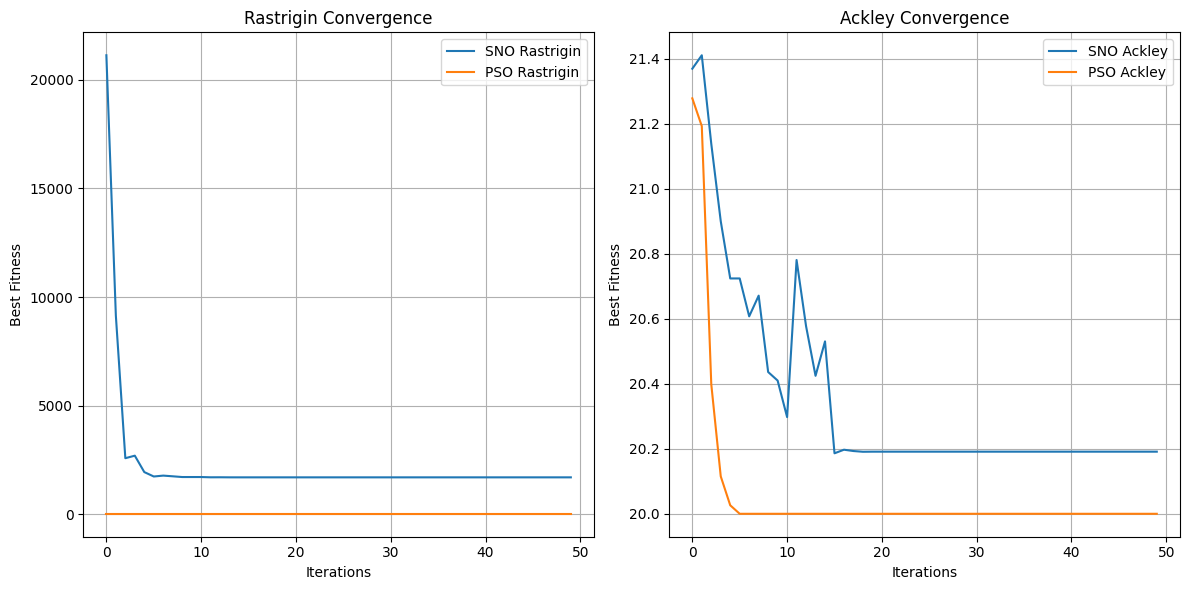

In [10]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- SNO Functions ---
def initialize_population_sno(num_nodes, dim, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.3)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], dim)
        G.nodes[node]['fitness'] = None
    return G

def evaluate_fitness_sno(G, func):
    for node in G.nodes:
        pos = G.nodes[node]['position']
        G.nodes[node]['fitness'] = func(pos)
    return len(G.nodes)

def diffuse_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        neighbor_fitness = [G.nodes[n]['fitness'] for n in neighbors]
        best_neighbor = neighbors[np.argmin(neighbor_fitness)]
        new_positions[node] = (
            G.nodes[node]['position'] * (1 - alpha) +
            G.nodes[best_neighbor]['position'] * alpha
        )
    for node, pos in new_positions.items():
        G.nodes[node]['position'] = pos

def sno_optimize(func, dim, bounds, num_nodes=20, iterations=50):
    G = initialize_population_sno(num_nodes, dim, bounds)
    best_fitness_over_time = []
    total_evaluations = 0

    for _ in range(iterations):
        evaluations = evaluate_fitness_sno(G, func)
        total_evaluations += evaluations
        diffuse_information(G)
        best_fitness = min([G.nodes[n]['fitness'] for n in G.nodes])
        best_fitness_over_time.append(best_fitness)

    best_solution = G.nodes[np.argmin([G.nodes[n]['fitness'] for n in G.nodes])]['position']
    return G, best_fitness_over_time, best_solution, total_evaluations

# --- PSO Functions ---
def initialize_population_pso(num_particles, dim, bounds):
    positions = np.random.uniform(bounds[0], bounds[1], (num_particles, dim))
    velocities = np.zeros((num_particles, dim))
    pbest_positions = positions.copy()
    pbest_fitness = np.array([func(pos) for pos in positions])
    gbest_idx = np.argmin(pbest_fitness)
    gbest_position = pbest_positions[gbest_idx].copy()
    gbest_fitness = pbest_fitness[gbest_idx]
    return positions, velocities, pbest_positions, pbest_fitness, gbest_position, gbest_fitness

def pso_optimize(func, dim, bounds, num_particles=20, iterations=50, w=0.7, c1=2.0, c2=2.0):
    positions, velocities, pbest_positions, pbest_fitness, gbest_position, gbest_fitness = initialize_population_pso(num_particles, dim, bounds)
    best_fitness_over_time = []
    total_evaluations = 0

    for _ in range(iterations):
        # Evaluate fitness
        fitness = np.array([func(pos) for pos in positions])
        total_evaluations += len(positions)

        # Update personal and global best
        improved = fitness < pbest_fitness
        pbest_positions[improved] = positions[improved].copy()
        pbest_fitness[improved] = fitness[improved]
        new_gbest_idx = np.argmin(pbest_fitness)
        if pbest_fitness[new_gbest_idx] < gbest_fitness:
            gbest_position = pbest_positions[new_gbest_idx].copy()
            gbest_fitness = pbest_fitness[new_gbest_idx]

        # Update velocities and positions
        r1, r2 = np.random.rand(num_particles, dim), np.random.rand(num_particles, dim)
        velocities = (w * velocities +
                      c1 * r1 * (pbest_positions - positions) +
                      c2 * r2 * (gbest_position - positions))
        positions = positions + velocities
        positions = np.clip(positions, bounds[0], bounds[1])  # Boundary control

        best_fitness_over_time.append(gbest_fitness)

    best_solution = gbest_position
    return best_fitness_over_time, best_solution, total_evaluations

# --- Benchmark Functions ---
def storn_chebyshev(x):
    n = len(x)
    x = np.clip(x, -1, 1)  # Fix domain issue
    return sum([(np.cos((j + 1) * np.arccos(x[i])) - (-1) ** j) ** 2 for i in range(n) for j in range(n)])

def inverse_hilbert(x):
    n = len(x)
    H = np.array([[1 / (i + j + 1) for j in range(n)] for i in range(n)])
    return np.linalg.norm(np.linalg.inv(H) - np.diag(x))

def lennard_jones(x, epsilon=1e-9):
    n = len(x) // 3
    X, Y, Z = x[:n], x[n:2*n], x[2*n:]
    energy = 0
    for i in range(n):
        for j in range(i + 1, n):
            r2 = (X[i] - X[j])**2 + (Y[i] - Y[j])**2 + (Z[i] - Z[j])**2
            if r2 < epsilon:
                continue
            energy += 4 * ((1/r2)**6 - (1/r2)**3)
    return energy

def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def griewank(x):
    sum_part = sum(xi**2 / 4000 for xi in x)
    prod_part = np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)])
    return sum_part - prod_part + 1

def weierstrass(x, a=0.5, b=3, k_max=20):
    return sum([sum([a**k * np.cos(2 * np.pi * b**k * (xi + 0.5)) for k in range(k_max)]) for xi in x])

def modified_schwefel(x):
    return 418.9829 * len(x) - sum([xi * np.sin(np.sqrt(abs(xi))) for xi in x])

def expanded_schaffer_f6(x):
    def f6(xi, xj):
        return 0.5 + (np.sin(np.sqrt(xi**2 + xj**2))**2 - 0.5) / (1 + 0.001 * (xi**2 + xj**2))**2
    return sum([f6(x[i], x[i+1]) for i in range(len(x)-1)])

def happy_cat(x):
    alpha = 1/8
    sum_x2 = sum([xi**2 for xi in x])
    return ((sum_x2 - len(x))**2)**alpha + (0.5 * sum_x2 + sum(x)) / len(x) + 0.5

def ackley(x):
    a, b, c = 20, 0.2, 2 * np.pi
    d = len(x)
    return -a * np.exp(-b * np.sqrt(np.sum(x**2) / d)) - np.exp(np.sum(np.cos(c * x)) / d) + a + np.exp(1)

# --- Function Details ---
function_details = {
    "Storn’s Chebyshev": (9, [-8192, 8192]),
    "Inverse Hilbert": (16, [-16384, 16384]),
    "Lennard-Jones": (18, [-4, 4]),
    "Rastrigin": (10, [-100, 100]),
    "Griewank": (10, [-100, 100]),
    "Weierstrass": (10, [-100, 100]),
    "Modified Schwefel": (10, [-100, 100]),
    "Expanded Schaffer F6": (10, [-100, 100]),
    "Happy Cat": (10, [-100, 100]),
    "Ackley": (10, [-100, 100])
}

benchmark_functions = {
    "Storn’s Chebyshev": storn_chebyshev,
    "Inverse Hilbert": inverse_hilbert,
    "Lennard-Jones": lennard_jones,
    "Rastrigin": rastrigin,
    "Griewank": griewank,
    "Weierstrass": weierstrass,
    "Modified Schwefel": modified_schwefel,
    "Expanded Schaffer F6": expanded_schaffer_f6,
    "Happy Cat": happy_cat,
    "Ackley": ackley
}

global_optima = {
    "Storn’s Chebyshev": 0.0,
    "Inverse Hilbert": 0.0,
    "Lennard-Jones": -1.0,
    "Rastrigin": 0.0,
    "Griewank": 0.0,
    "Weierstrass": 0.0,
    "Modified Schwefel": 0.0,
    "Expanded Schaffer F6": 0.0,
    "Happy Cat": 0.0,
    "Ackley": 0.0
}

# --- Run SNO and PSO and Collect Metrics ---
num_runs = 10
max_iterations = 50
num_nodes = 20  # For SNO
num_particles = 20  # For PSO, matching SNO population size

metrics = {
    "Function": [],
    "SNO Avg Func Evals": [], "PSO Avg Func Evals": [],
    "SNO Avg Best Fitness": [], "PSO Avg Best Fitness": [],
    "SNO Success Rate (SR)": [], "PSO Success Rate (SR)": [],
    "SNO Robustness Score": [], "PSO Robustness Score": [],
    "SNO Population Diversity (PD)": [], "PSO Population Diversity (PD)": [],
    "SNO Success Rate with Threshold (SRT)": [], "PSO Success Rate with Threshold (SRT)": [],
    "SNO Convergence Speed (CS)": [], "PSO Convergence Speed (CS)": []
}

for name, func in benchmark_functions.items():
    dim, bounds = function_details[name]

    # SNO Metrics
    sno_best_fitnesses, sno_function_evals, sno_all_solutions = [], [], []
    for _ in range(num_runs):
        G, fitness_history, best_solution, evaluations = sno_optimize(func, dim, bounds, num_nodes, max_iterations)
        sno_best_fitnesses.append(min(fitness_history))
        sno_function_evals.append(evaluations)
        sno_all_solutions.append(best_solution)

    # PSO Metrics
    pso_best_fitnesses, pso_function_evals, pso_all_solutions = [], [], []
    for _ in range(num_runs):
        fitness_history, best_solution, evaluations = pso_optimize(func, dim, bounds, num_particles, max_iterations)
        pso_best_fitnesses.append(min(fitness_history))
        pso_function_evals.append(evaluations)
        pso_all_solutions.append(best_solution)

    # Calculate SNO Metrics
    sno_mean_fitness = np.mean(sno_best_fitnesses)
    sno_mean_evals = np.mean(sno_function_evals)
    sno_variance_fitness = np.var(sno_best_fitnesses)
    sno_success_rate = np.mean(np.array([abs(f - global_optima[name]) <= 0.01 for f in sno_best_fitnesses]))
    sno_population_diversity = np.mean([np.var(sol) for sol in sno_all_solutions])
    sno_success_rate_threshold = np.mean(np.array([abs(f - global_optima[name]) <= 0.05 for f in sno_best_fitnesses]))
    sno_convergence_speed = sno_mean_evals / max_iterations

    # Calculate PSO Metrics
    pso_mean_fitness = np.mean(pso_best_fitnesses)
    pso_mean_evals = np.mean(pso_function_evals)
    pso_variance_fitness = np.var(pso_best_fitnesses)
    pso_success_rate = np.mean(np.array([abs(f - global_optima[name]) <= 0.01 for f in pso_best_fitnesses]))
    pso_population_diversity = np.mean([np.var(sol) for sol in pso_all_solutions])
    pso_success_rate_threshold = np.mean(np.array([abs(f - global_optima[name]) <= 0.05 for f in pso_best_fitnesses]))
    pso_convergence_speed = pso_mean_evals / max_iterations

    # Store Metrics
    metrics["Function"].append(name)
    metrics["SNO Avg Func Evals"].append(sno_mean_evals)
    metrics["PSO Avg Func Evals"].append(pso_mean_evals)
    metrics["SNO Avg Best Fitness"].append(sno_mean_fitness)
    metrics["PSO Avg Best Fitness"].append(pso_mean_fitness)
    metrics["SNO Success Rate (SR)"].append(sno_success_rate)
    metrics["PSO Success Rate (SR)"].append(pso_success_rate)
    metrics["SNO Robustness Score"].append(sno_variance_fitness)
    metrics["PSO Robustness Score"].append(pso_variance_fitness)
    metrics["SNO Population Diversity (PD)"].append(sno_population_diversity)
    metrics["PSO Population Diversity (PD)"].append(pso_population_diversity)
    metrics["SNO Success Rate with Threshold (SRT)"].append(sno_success_rate_threshold)
    metrics["PSO Success Rate with Threshold (SRT)"].append(pso_success_rate_threshold)
    metrics["SNO Convergence Speed (CS)"].append(sno_convergence_speed)
    metrics["PSO Convergence Speed (CS)"].append(pso_convergence_speed)

# --- Store Results in DataFrame ---
df_results = pd.DataFrame(metrics)
df_results.to_csv("SNO_vs_PSO_Results.csv", index=False)
print(df_results)

# --- Plot Convergence for Rastrigin and Ackley ---
# SNO
G_rastrigin, sno_fitness_rastrigin, _, _ = sno_optimize(rastrigin, 10, [-100, 100])
G_ackley, sno_fitness_ackley, _, _ = sno_optimize(ackley, 10, [-100, 100])

# PSO
pso_fitness_rastrigin, _, _ = pso_optimize(rastrigin, 10, [-100, 100])
pso_fitness_ackley, _, _ = pso_optimize(ackley, 10, [-100, 100])

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sno_fitness_rastrigin, label='SNO Rastrigin')
plt.plot(pso_fitness_rastrigin, label='PSO Rastrigin')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('Rastrigin Convergence')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sno_fitness_ackley, label='SNO Ackley')
plt.plot(pso_fitness_ackley, label='PSO Ackley')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('Ackley Convergence')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

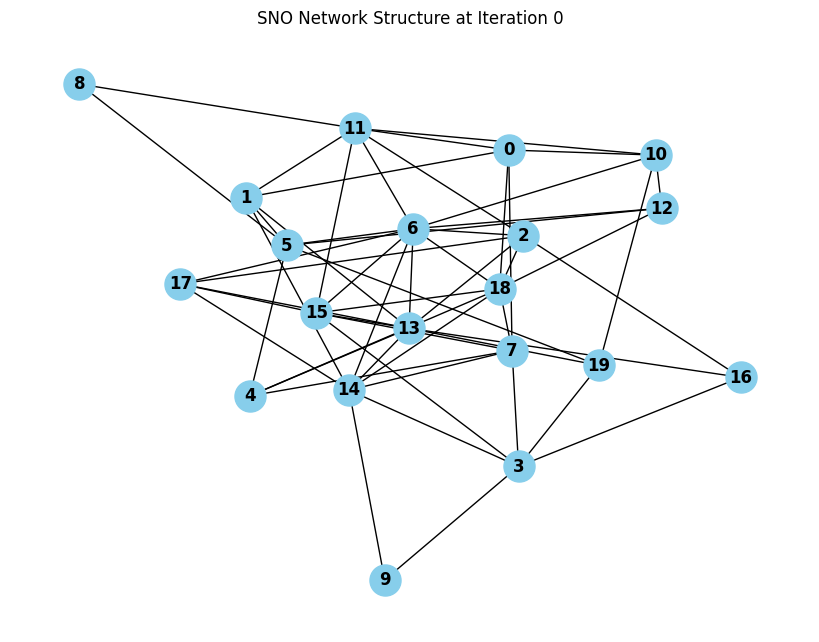

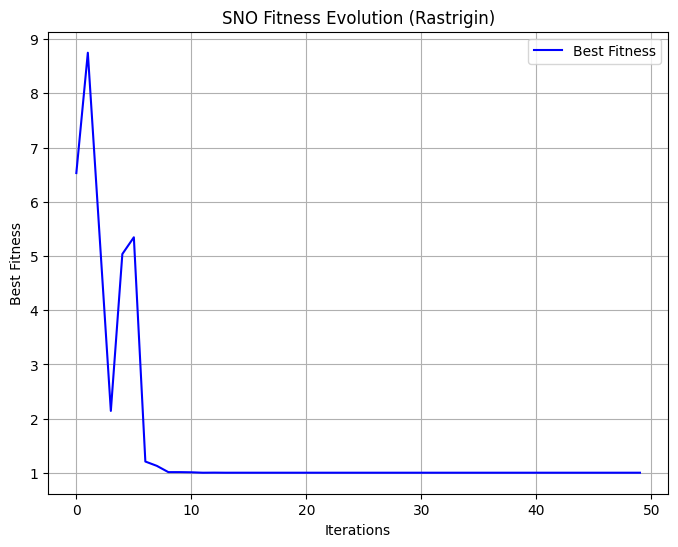

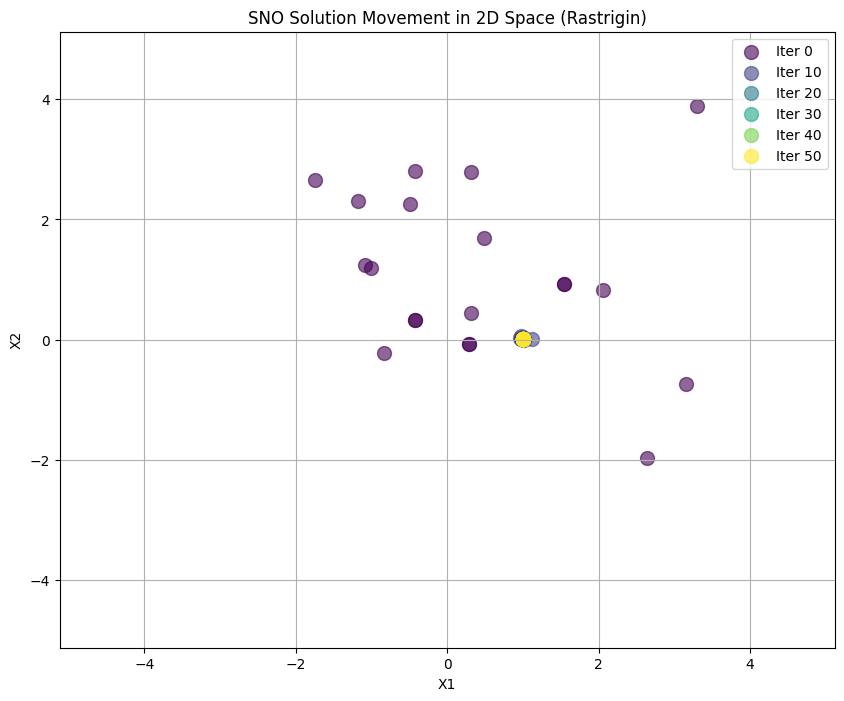

In [11]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- SNO Functions ---
def initialize_population(num_nodes, dim, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.3)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], dim)
        G.nodes[node]['fitness'] = None
    return G

def evaluate_fitness(G, func):
    for node in G.nodes:
        pos = G.nodes[node]['position']
        G.nodes[node]['fitness'] = func(pos)
    return len(G.nodes)

def diffuse_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        neighbor_fitness = [G.nodes[n]['fitness'] for n in neighbors]
        best_neighbor = neighbors[np.argmin(neighbor_fitness)]
        new_positions[node] = (
            G.nodes[node]['position'] * (1 - alpha) +
            G.nodes[best_neighbor]['position'] * alpha
        )
    for node, pos in new_positions.items():
        G.nodes[node]['position'] = pos

def sno_optimize_with_tracking(func, dim, bounds, num_nodes=20, iterations=50, track_every=10):
    G = initialize_population(num_nodes, dim, bounds)
    best_fitness_over_time = []
    positions_over_time = []  # Track positions for visualization
    total_evaluations = 0

    for i in range(iterations):
        evaluations = evaluate_fitness(G, func)
        total_evaluations += evaluations
        diffuse_information(G)
        best_fitness = min([G.nodes[n]['fitness'] for n in G.nodes])
        best_fitness_over_time.append(best_fitness)

        # Track positions every 'track_every' iterations
        if i % track_every == 0 or i == iterations - 1:
            positions = np.array([G.nodes[n]['position'] for n in G.nodes])
            positions_over_time.append(positions)

    best_solution = G.nodes[np.argmin([G.nodes[n]['fitness'] for n in G.nodes])]['position']
    return G, best_fitness_over_time, best_solution, total_evaluations, positions_over_time

# --- Benchmark Function (Using Rastrigin for Demo) ---
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# --- Plotting Functions ---
def plot_network(G, iteration):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Layout for visualization
    nx.draw(G, pos, node_color='skyblue', node_size=500, with_labels=True, font_weight='bold')
    plt.title(f"SNO Network Structure at Iteration {iteration}")
    plt.show()

def plot_fitness_evolution(fitness_history):
    plt.figure(figsize=(8, 6))
    plt.plot(fitness_history, label='Best Fitness', color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Best Fitness')
    plt.title('SNO Fitness Evolution (Rastrigin)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_solution_movement(positions_over_time, bounds):
    plt.figure(figsize=(10, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(positions_over_time)))

    for i, positions in enumerate(positions_over_time):
        plt.scatter(positions[:, 0], positions[:, 1], c=[colors[i]], label=f'Iter {i*10}', alpha=0.6, s=100)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('SNO Solution Movement in 2D Space (Rastrigin)')
    plt.legend()
    plt.xlim(bounds[0], bounds[1])
    plt.ylim(bounds[0], bounds[1])
    plt.grid(True)
    plt.show()

# --- Demonstration ---
dim = 2  # Use 2D for visualization
bounds = [-5.12, 5.12]  # Rastrigin bounds
num_nodes = 20
iterations = 50

# Run SNO with tracking
G, fitness_history, best_solution, total_evaluations, positions_over_time = sno_optimize_with_tracking(
    rastrigin, dim, bounds, num_nodes, iterations, track_every=10
)

# Generate Plots
plot_network(G, 0)  # Initial network structure
plot_fitness_evolution(fitness_history)  # Fitness over time
plot_solution_movement(positions_over_time, bounds)  # Solution movement

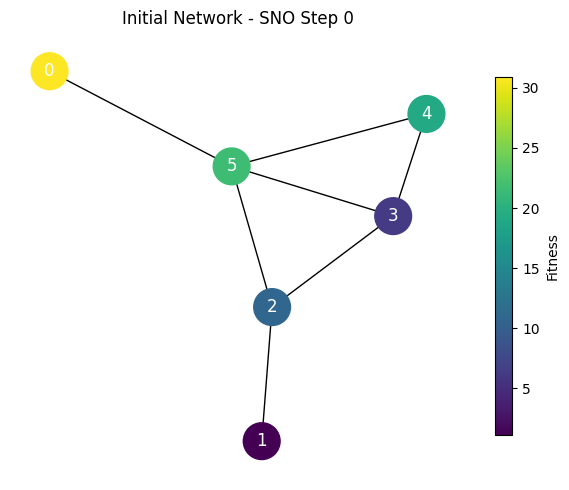

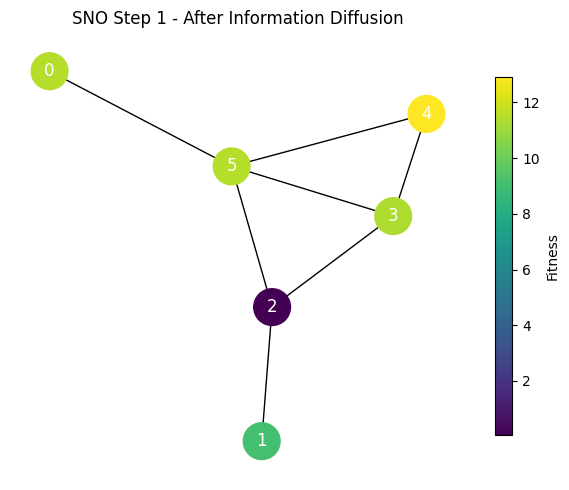

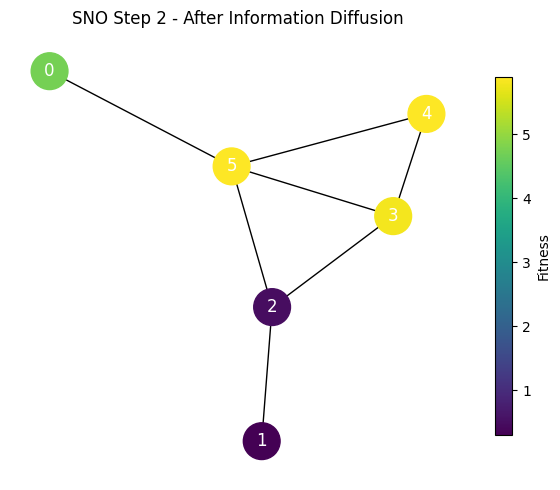

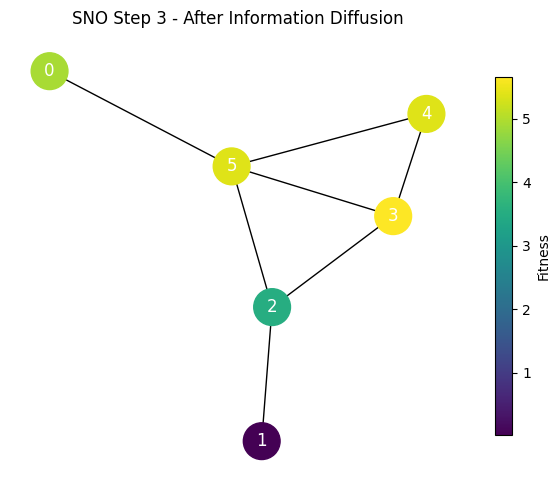

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define a simple test function
def sphere(x):
    return sum([xi**2 for xi in x])

# Initialize a small population graph for demonstration
def initialize_demo_population(num_nodes, dim, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.5)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], dim)
        G.nodes[node]['fitness'] = sphere(G.nodes[node]['position'])
    return G

# Diffuse best neighbor's position
def demo_diffuse_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if neighbors:
            best_neighbor = min(neighbors, key=lambda n: G.nodes[n]['fitness'])
            current_pos = G.nodes[node]['position']
            best_pos = G.nodes[best_neighbor]['position']
            new_positions[node] = (1 - alpha) * current_pos + alpha * best_pos
    for node, new_pos in new_positions.items():
        G.nodes[node]['position'] = new_pos
        G.nodes[node]['fitness'] = sphere(new_pos)
def plot_graph(G, title):
    fig, ax = plt.subplots(figsize=(6, 5))  # Create fig and ax explicitly
    pos = nx.spring_layout(G, seed=42)
    fitness_values = np.array([G.nodes[n]['fitness'] for n in G.nodes])
    norm_fitness = (fitness_values - fitness_values.min()) / (fitness_values.max() - fitness_values.min() + 1e-9)
    node_colors = 1 - norm_fitness  # darker = better fitness

    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis, node_size=700, font_color='white', ax=ax)  # Pass ax to nx.draw
    plt.title(title)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=fitness_values.min(), vmax=fitness_values.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.8)  # Pass ax to colorbar
    cbar.set_label('Fitness')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Step-by-step demo
G_demo = initialize_demo_population(num_nodes=6, dim=2, bounds=(-5, 5))
plot_graph(G_demo, "Initial Network - SNO Step 0")

for step in range(1, 4):
    demo_diffuse_information(G_demo, alpha=0.5)
    plot_graph(G_demo, f"SNO Step {step} - After Information Diffusion")


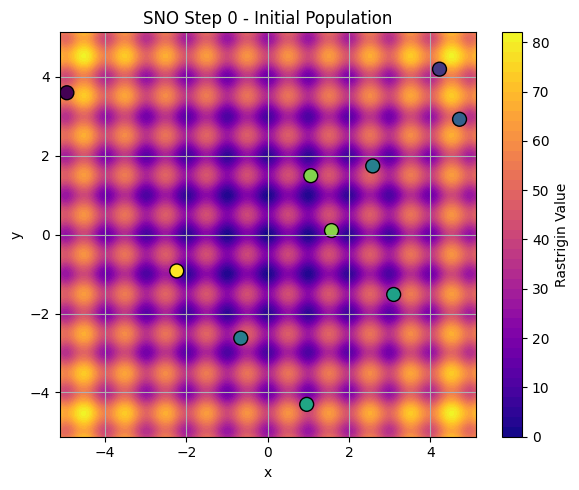

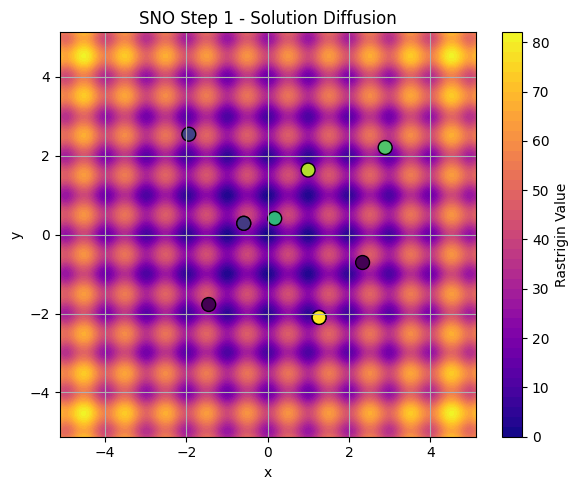

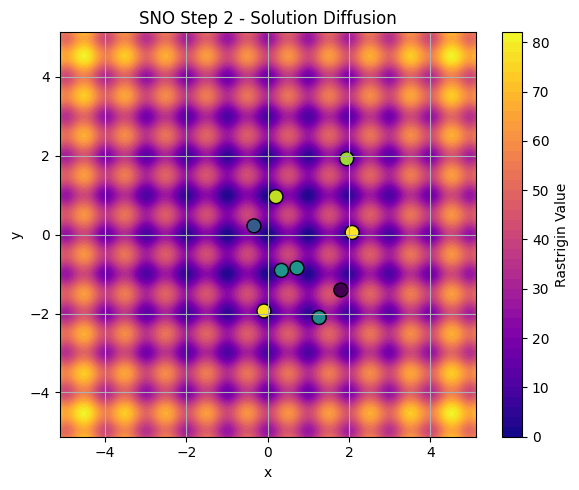

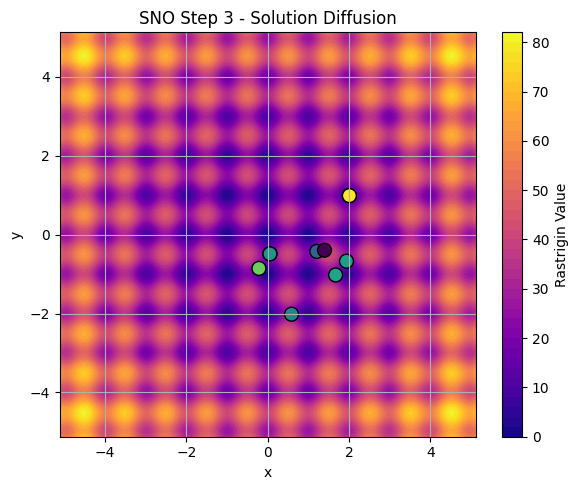

In [14]:
# Let's create a more problem-focused demo: solving a 2D Rastrigin optimization problem using SNO and visualize progress

def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# Setup for 2D problem
def initialize_demo_rastrigin(num_nodes, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.5)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], 2)
        G.nodes[node]['fitness'] = rastrigin(G.nodes[node]['position'])
    return G

def diffuse_rastrigin_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if neighbors:
            best_neighbor = min(neighbors, key=lambda n: G.nodes[n]['fitness'])
            current_pos = G.nodes[node]['position']
            best_pos = G.nodes[best_neighbor]['position']
            new_positions[node] = (1 - alpha) * current_pos + alpha * best_pos
    for node, new_pos in new_positions.items():
        G.nodes[node]['position'] = new_pos
        G.nodes[node]['fitness'] = rastrigin(new_pos)

def plot_rastrigin_progress(G, title, bounds):
    fitness_vals = np.array([G.nodes[n]['fitness'] for n in G.nodes])
    positions = np.array([G.nodes[n]['position'] for n in G.nodes])
    norm_fitness = (fitness_vals - np.min(fitness_vals)) / (np.ptp(fitness_vals) + 1e-9)

    # Plot contour of the Rastrigin function
    x = np.linspace(bounds[0], bounds[1], 200)
    y = np.linspace(bounds[0], bounds[1], 200)
    X, Y = np.meshgrid(x, y)
    Z = rastrigin([X, Y])

    plt.figure(figsize=(6, 5))
    plt.contourf(X, Y, Z, levels=50, cmap='plasma')
    plt.colorbar(label='Rastrigin Value')
    plt.scatter(positions[:, 0], positions[:, 1], c=1 - norm_fitness, cmap='viridis', edgecolors='k', s=100)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run demo for solving Rastrigin
bounds = (-5.12, 5.12)
G_demo_rastrigin = initialize_demo_rastrigin(num_nodes=10, bounds=bounds)
plot_rastrigin_progress(G_demo_rastrigin, "SNO Step 0 - Initial Population", bounds)

for step in range(1, 4):
    diffuse_rastrigin_information(G_demo_rastrigin)
    plot_rastrigin_progress(G_demo_rastrigin, f"SNO Step {step} - Solution Diffusion", bounds)
